# Emergency Detection based on Audio (Features)

## Initialization

In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For file management
from glob import glob

# Nessessary for audio processing
import librosa
import librosa.display

# For audio playback
import IPython.display as ipd

## Data Acquisition

In [30]:
# Download the dataset from Kaggle (if you haven't already) and add some other data to it (if you want)
# !kaggle datasets download -d vishnu0399/emergency-vehicle-siren-sounds
# !unzip emergency-vehicle-siren-sounds.zip

In [31]:
# Filter out the data so that only the sounds are left
import os

sounds_path = glob('./dataset/emergency/*.png')
sounds_path.extend(glob('./dataset/non-emergency/*.png'))

# Delete the images
for path in sounds_path:
    os.remove(path)

In [32]:
# Testing the emergency sound
ipd.Audio('./dataset/emergency/sound_1.wav')

In [33]:
# Testing the non-emergency sound
ipd.Audio('./dataset/non-emergency/sound_401.wav')

## Exploratory Data Analysis

### Overview

In [34]:
# Data distribution
# Emergency sounds
emergency_sounds = glob('./dataset/emergency/*.wav')
print('Number of emergency sounds:', len(emergency_sounds))

# Non-emergency sounds
non_emergency_sounds = glob('./dataset/non-emergency/*.wav')
print('Number of non-emergency sounds:', len(non_emergency_sounds))

Number of emergency sounds: 400
Number of non-emergency sounds: 600


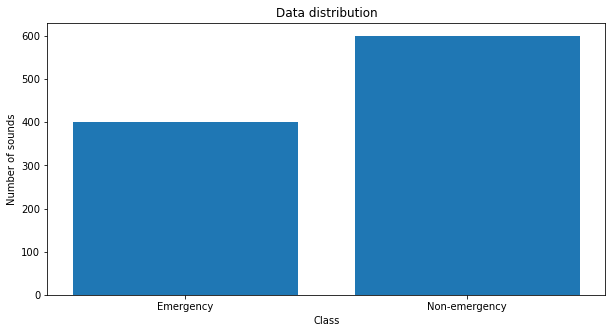

In [35]:
# Plotting the data distribution
plt.figure(figsize=(10, 5))
plt.bar(['Emergency', 'Non-emergency'], [len(emergency_sounds), len(non_emergency_sounds)])
plt.title('Data distribution')
plt.xlabel('Class')
plt.ylabel('Number of sounds')
plt.show()

### Time Domain

In [36]:
# Load the audio files
# Define sampling rate
emergency, sr = librosa.load('./dataset/emergency/sound_1.wav')
non_emergency, sr = librosa.load('./dataset/non-emergency/sound_401.wav')

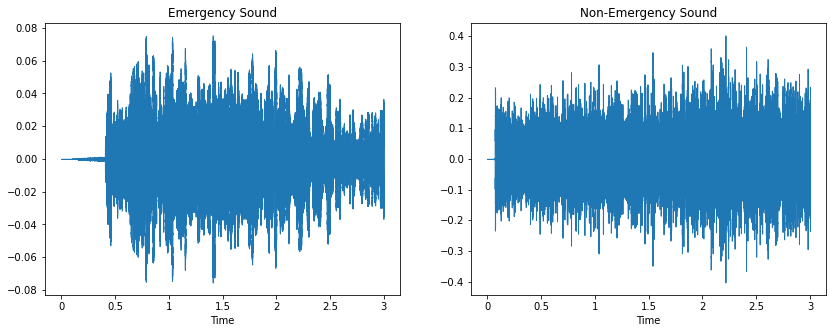

In [37]:
# Plot the audio files
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
librosa.display.waveshow(emergency, sr=sr)
plt.title('Emergency Sound')
plt.subplot(1, 2, 2)
librosa.display.waveshow(non_emergency, sr=sr)
plt.title('Non-Emergency Sound')
plt.show()

Not much to see here, just a bunch of audio files.

### Frequency Domain

In [38]:
# Frequency domain representation of the emergency sound and non-emergency sound
# Compute the Fast Fourier Transform (FFT) of the audio
fft_emergency = np.fft.fft(emergency)
fft_non_emergency = np.fft.fft(non_emergency)

# Compute the magnitude of the FFT
magnitude_emergency = np.abs(fft_emergency)
magnitude_non_emergency = np.abs(fft_non_emergency)

# Frequency of each component in Hz
f = np.linspace(0, sr, len(magnitude_emergency))

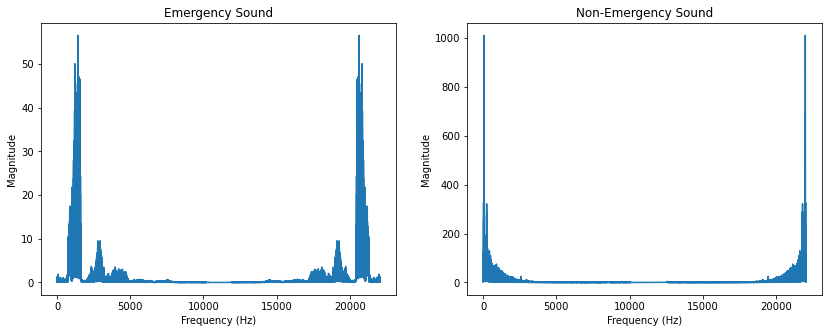

In [39]:
# Plot the frequency spectrum
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(f, magnitude_emergency)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Emergency Sound')
plt.subplot(1, 2, 2)
plt.plot(f, magnitude_non_emergency)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Non-Emergency Sound')
plt.show()

The frequency domain is much more interesting. We can see that the emergency audio files have a much higher frequency than the non-emergency audio files.

### Spectrogram Domain (Time-Frequency Domain)

#### Spectrogram

In [40]:
# Spectrogram of the emergency sound and non-emergency sound
# Compute the spectrogram of the audio
spectrum_emergency = np.abs(librosa.stft(emergency))
spectrum_non_emergency = np.abs(librosa.stft(non_emergency))

In [41]:
# Plot the spectrogram
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
librosa.display.specshow(spectrum_emergency, sr=sr, x_axis='time', y_axis='hz')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Emergency Sound')
plt.subplot(1, 2, 2)
librosa.display.specshow(spectrum_non_emergency, sr=sr, x_axis='time', y_axis='hz')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Non-Emergency Sound')
plt.show()

#### MFCC

In [42]:
# Mel-frequency cepstral coefficients (MFCCs)
# Extract the MFCCs
mfcc_emergency = librosa.feature.mfcc(emergency)
mfcc_non_emergency = librosa.feature.mfcc(non_emergency)

C:\Users\dikib\AppData\Local\Temp/ipykernel_7952/1296774215.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.02308656 0.020012   0.01103913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_emergency = librosa.feature.mfcc(emergency)
C:\Users\dikib\AppData\Local\Temp/ipykernel_7952/1296774215.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13293335 -0.11833936
 -0.10440459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_non_emergency = librosa.feature.mfcc(non_emergency)


In [43]:
# Display the MFCCs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc_emergency)
plt.xlabel('Time')
plt.ylabel('MFCC coefficients')
plt.title('Emergency Sound')
plt.colorbar()
plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc_non_emergency)
plt.xlabel('Time')
plt.ylabel('MFCC coefficients')
plt.title('Non-Emergency Sound')
plt.colorbar()
plt.show()

#### Mel Spectrogram

In [44]:
# Mel Spectrogram
# Extract the Mel Spectrogram
ms_emergency = librosa.feature.melspectrogram(emergency)
ms_non_emergency = librosa.feature.melspectrogram(non_emergency)

C:\Users\dikib\AppData\Local\Temp/ipykernel_7952/3960920108.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.02308656 0.020012   0.01103913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms_emergency = librosa.feature.melspectrogram(emergency)
C:\Users\dikib\AppData\Local\Temp/ipykernel_7952/3960920108.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13293335 -0.11833936
 -0.10440459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms_non_emergency = librosa.feature.melspectrogram(non_emergency)


In [45]:
# Display the Mel Spectrogram
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.power_to_db(ms_emergency, ref=np.max))
plt.xlabel('Time')
plt.ylabel('Mel Spectrogram')
plt.title('Emergency Sound')
plt.colorbar()
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.power_to_db(ms_non_emergency, ref=np.max))
plt.xlabel('Time')
plt.ylabel('Mel Spectrogram')
plt.title('Non-Emergency Sound')
plt.colorbar()
plt.show()

Here's where things get interesting. We can see that from analyzing time-frequency domain, there's a huge difference between emergency and non-emergency audio files. The emergency audio files have a much higher frequency than the non-emergency audio files. This is a good sign that we can use this to classify emergency and non-emergency audio files by using these features as inputs to a machine learning model.

## Data Preprocessing

### Data Augmentation

In [46]:
# Augmenting functions
def add_noise(signal):
    noise = np.random.randn(len(signal))
    noise_signal = signal + 0.005 * noise
    return noise_signal

def shift(signal):
    return np.roll(signal, 1600)

def stretch(signal, rate=0.8):
    return librosa.effects.time_stretch(signal, rate)

In [47]:
# Testing the augmenting functions
# Add noise
noise_emergency = add_noise(emergency)

# Shift the audio
shift_emergency = shift(emergency)

# Stretch the audio
stretch_emergency = stretch(emergency)

C:\Users\dikib\AppData\Local\Temp/ipykernel_7952/4274662670.py:11: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(signal, rate)


In [48]:
# Plot the audio
plt.figure(figsize=(14, 5))
plt.subplot(1, 4, 1)
librosa.display.waveshow(emergency, sr=sr)
plt.title('Emergency Sound')
plt.subplot(1, 4, 2)
librosa.display.waveshow(noise_emergency, sr=sr)
plt.title('Emergency Sound + Noise')
plt.subplot(1, 4, 3)
librosa.display.waveshow(shift_emergency, sr=sr)
plt.title('Emergency Sound + Shift')
plt.subplot(1, 4, 4)
librosa.display.waveshow(stretch_emergency, sr=sr)
plt.title('Emergency Sound + Stretch')
plt.show()

In [49]:
# Play the augmented audio
# Add noise
ipd.Audio(noise_emergency, rate=sr)

In [50]:
# Shift the audio
ipd.Audio(shift_emergency, rate=sr)

In [51]:
# Stretch the audio
ipd.Audio(stretch_emergency, rate=sr)

### Data Preparation

In [52]:
# Initialize the dataframe
# Label annotation, 0 = non-emergency, 1 = emergency
df = pd.DataFrame(columns=['signal', 'label'])

In [53]:
# Define the path to the audio files
emergency_audio_path = glob('./dataset/emergency/*.wav')
non_emergency_audio_path = glob('./dataset/non-emergency/*.wav')

In [54]:
# Add the audio signals and assign the labels
for emergency_audio in emergency_audio_path:
    signal, sr = librosa.load(emergency_audio)
    df.loc[len(df)] = [signal, 1]

for non_emergency_audio in non_emergency_audio_path:
    signal, sr = librosa.load(non_emergency_audio)
    df.loc[len(df)] = [signal, 0]

In [55]:
df

signal label
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
1    [-6.214049e-05, -9.345361e-05, -6.516957e-05, ...     1
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
3    [-0.032152344, 0.0028992137, -0.048407882, -0....     1
4    [0.2607958, 0.35347039, 0.20466022, 0.11311894...     1
..                                                 ...   ...
995  [0.0007953993, 0.016493868, 0.025731942, 0.027...     0
996  [0.0008008636, 0.010126503, 0.025674632, 0.045...     0
997  [-0.008738654, 0.0015984675, 0.024057182, 0.03...     0
998  [-0.029727146, -0.033623997, -0.007992181, 0.0...     0
999  [-0.009733823, 0.00023435388, 0.021301597, 0.0...     0

[1000 rows x 2 columns]

In [56]:
# Augment the audio files
for i in range(0, len(df)):
    # Add noise
    df.loc[len(df)] = [add_noise(df['signal'][i]), df['label'][i]]

    # Shift the audio
    df.loc[len(df)] = [shift(df['signal'][i]), df['label'][i]]

    # Stretch the audio
    df.loc[len(df)] = [stretch(df['signal'][i]), df['label'][i]]

C:\Users\dikib\AppData\Local\Temp/ipykernel_7952/4274662670.py:11: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(signal, rate)


In [57]:
df

signal label
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
1     [-6.214049e-05, -9.345361e-05, -6.516957e-05, ...     1
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1
3     [-0.032152344, 0.0028992137, -0.048407882, -0....     1
4     [0.2607958, 0.35347039, 0.20466022, 0.11311894...     1
...                                                 ...   ...
3995  [-0.019998511, -0.035862498, -0.04710313, -0.0...     0
3996  [-0.029766236, -0.03386253, -0.008271959, 0.00...     0
3997  [-0.013998818468653237, -0.006591378511712118,...     0
3998  [0.086297035, 0.0671722, 0.04822918, 0.0334221...     0
3999  [-0.010598163, -0.0006095997, 0.020492615, 0.0...     0

[4000 rows x 2 columns]

## Feature Extraction

In [58]:
# Extracting features from the y=signal, sr=sr files
def extract_features(signal):
    features = []

    ## Time-domain features
    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)

    # RMS
    rms = np.mean(librosa.feature.rms(y=signal).T, axis=0)

    ## Frequency-domain features
    # Spectral Centroid
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=signal, sr=sr).T, axis=0)

    # Spectral Bandwidth
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=signal, sr=sr).T, axis=0)

    # Spectral Roll-off
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=signal, sr=sr).T, axis=0)
    
    ## Time-frequency domain features
    # Chroma
    stft = np.abs(librosa.stft(y=signal))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sr).T, axis=0)

    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=signal, sr=sr).T, axis=0)

    # Contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)

    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y=signal), sr=sr).T, axis=0)
    
    features.extend(
        [
            zcr,
            rms,
            spec_cent,
            spec_bw,
            rolloff,
            chroma,
            mfcc,
            mel,
            contrast,
            tonnetz,
        ]
    )

    return features

In [59]:
# Extracting features for each signal
df['features'] = df['signal'].apply(lambda x: extract_features(x))

c:\Users\dikib\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
c:\Users\dikib\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)


In [60]:
df

signal label  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1   
1     [-6.214049e-05, -9.345361e-05, -6.516957e-05, ...     1   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1   
3     [-0.032152344, 0.0028992137, -0.048407882, -0....     1   
4     [0.2607958, 0.35347039, 0.20466022, 0.11311894...     1   
...                                                 ...   ...   
3995  [-0.019998511, -0.035862498, -0.04710313, -0.0...     0   
3996  [-0.029766236, -0.03386253, -0.008271959, 0.00...     0   
3997  [-0.013998818468653237, -0.006591378511712118,...     0   
3998  [0.086297035, 0.0671722, 0.04822918, 0.0334221...     0   
3999  [-0.010598163, -0.0006095997, 0.020492615, 0.0...     0   

                                               features  
0     [[0.13004056490384616], [0.016322851], [1882.2...  
1     [[0.12743389423076923], [0.016226849], [1926.7...  
2     [[0.1251915564903846], [0.19594102], [2228.536...  
3     [[0.1277794471153846], [0.19286361], [2017.839...  
4     [[0.10299353966346154], [0.24993902], [1634.52...  
...                                                 ...  
3995  [[0.05330528846153846], [0.059206903], [1058.8...  
3996  [[0.056565272955246916], [0.040002223], [1071....  
3997  [[0.06398737980769231], [0.061987085960522055]...  
3998  [[0.05391000600961538], [0.061772786], [1106.2...  
3999  [[0.051781925154320986], [0.044002958], [1093....  

[4000 rows x 3 columns]

## Feature Engineering

In [61]:
# Copy the dataframe
df_copy = df.copy()

In [62]:
df_copy

signal label  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1   
1     [-6.214049e-05, -9.345361e-05, -6.516957e-05, ...     1   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     1   
3     [-0.032152344, 0.0028992137, -0.048407882, -0....     1   
4     [0.2607958, 0.35347039, 0.20466022, 0.11311894...     1   
...                                                 ...   ...   
3995  [-0.019998511, -0.035862498, -0.04710313, -0.0...     0   
3996  [-0.029766236, -0.03386253, -0.008271959, 0.00...     0   
3997  [-0.013998818468653237, -0.006591378511712118,...     0   
3998  [0.086297035, 0.0671722, 0.04822918, 0.0334221...     0   
3999  [-0.010598163, -0.0006095997, 0.020492615, 0.0...     0   

                                               features  
0     [[0.13004056490384616], [0.016322851], [1882.2...  
1     [[0.12743389423076923], [0.016226849], [1926.7...  
2     [[0.1251915564903846], [0.19594102], [2228.536...  
3     [[0.1277794471153846], [0.19286361], [2017.839...  
4     [[0.10299353966346154], [0.24993902], [1634.52...  
...                                                 ...  
3995  [[0.05330528846153846], [0.059206903], [1058.8...  
3996  [[0.056565272955246916], [0.040002223], [1071....  
3997  [[0.06398737980769231], [0.061987085960522055]...  
3998  [[0.05391000600961538], [0.061772786], [1106.2...  
3999  [[0.051781925154320986], [0.044002958], [1093....  

[4000 rows x 3 columns]

In [63]:
# Dropping the signal column
df_copy.drop(['signal'], axis=1, inplace=True)

In [64]:
df_copy

label                                           features
0        1  [[0.13004056490384616], [0.016322851], [1882.2...
1        1  [[0.12743389423076923], [0.016226849], [1926.7...
2        1  [[0.1251915564903846], [0.19594102], [2228.536...
3        1  [[0.1277794471153846], [0.19286361], [2017.839...
4        1  [[0.10299353966346154], [0.24993902], [1634.52...
...    ...                                                ...
3995     0  [[0.05330528846153846], [0.059206903], [1058.8...
3996     0  [[0.056565272955246916], [0.040002223], [1071....
3997     0  [[0.06398737980769231], [0.061987085960522055]...
3998     0  [[0.05391000600961538], [0.061772786], [1106.2...
3999     0  [[0.051781925154320986], [0.044002958], [1093....

[4000 rows x 2 columns]

In [65]:
# Split the features according to its type
def split_features(dataframe):
    # Copy the dataframe
    df_copy = dataframe.copy()

    # Split the single dimensional features according to its type
    df_copy['zcr'] = df_copy['features'].apply(lambda x: float(x[0]))
    df_copy['rms'] = df_copy['features'].apply(lambda x: float(x[1]))
    df_copy['spec_cent'] = df_copy['features'].apply(lambda x: float(x[2]))
    df_copy['spec_bw'] = df_copy['features'].apply(lambda x: float(x[3]))
    df_copy['rolloff'] = df_copy['features'].apply(lambda x: float(x[4]))

    # Split the two dimensional features according to its type
    df_chroma = pd.DataFrame(df_copy['features'].apply(lambda x: x[5]).tolist(), columns=[f"chroma{i}" for i in range(12)])
    df_mfcc = pd.DataFrame(df_copy['features'].apply(lambda x: x[6]).tolist(), columns=[f"mfcc{i}" for i in range(20)])
    df_mel = pd.DataFrame(df_copy['features'].apply(lambda x: x[7]).tolist(), columns=[f"mel{i}" for i in range(128)])
    df_contrast = pd.DataFrame(df_copy['features'].apply(lambda x: x[8]).tolist(), columns=[f"contrast{i}" for i in range(7)])
    df_tonnetz = pd.DataFrame(df_copy['features'].apply(lambda x: x[9]).tolist(), columns=[f"tonnetz{i}" for i in range(6)])

    # Concatenate the features into a single dataframe
    df_features = pd.concat(
        [
            df_copy['zcr'],
            df_copy['rms'],
            df_copy['spec_cent'],
            df_copy['spec_bw'],
            df_copy['rolloff'],
            df_chroma,
            df_mfcc,
            df_mel,
            df_contrast,
            df_tonnetz,
        ],
        axis=1,
    )

    return df_features

In [66]:
# Split the features for each signal
df_split = split_features(df_copy)

In [67]:
df_split

zcr       rms    spec_cent      spec_bw      rolloff   chroma0  \
0     0.130041  0.016323  1882.210327  1333.028640  3006.283616  0.205162   
1     0.127434  0.016227  1926.737413  1405.361426  3124.384953  0.233384   
2     0.125192  0.195941  2228.536708  2154.212801  4551.456581  0.507237   
3     0.127779  0.192864  2017.839941  1892.542241  3509.829289  0.251954   
4     0.102994  0.249939  1634.523635  1580.783375  2465.717398  0.240601   
...        ...       ...          ...          ...          ...       ...   
3995  0.053305  0.059207  1058.819818  1356.337659  1913.307918  0.878634   
3996  0.056565  0.040002  1071.115148  1358.969330  1924.363878  0.857033   
3997  0.063987  0.061987  1733.495357  2426.686830  3221.367188  0.859018   
3998  0.053910  0.061773  1106.276459  1410.558984  1936.497521  0.850812   
3999  0.051782  0.044003  1093.138853  1398.576060  1924.031576  0.797207   

       chroma1   chroma2   chroma3   chroma4  ...  contrast3  contrast4  \
0     0.225204  0.264359  0.305373  0.318554  ...  31.915013  34.800137   
1     0.247812  0.304642  0.327444  0.355111  ...  31.795842  32.070341   
2     0.533283  0.550340  0.566979  0.582866  ...  18.202129  15.533248   
3     0.279349  0.365274  0.463445  0.516898  ...  23.953848  18.295315   
4     0.256917  0.243024  0.259694  0.270361  ...  27.341440  21.558184   
...        ...       ...       ...       ...  ...        ...        ...   
3995  0.835595  0.776115  0.788314  0.817653  ...  13.869216  17.435944   
3996  0.865656  0.786015  0.757883  0.799426  ...  14.936777  18.379655   
3997  0.837816  0.821001  0.798269  0.803174  ...  14.025254  16.547875   
3998  0.829282  0.811646  0.783266  0.785619  ...  14.148936  16.936672   
3999  0.777860  0.792537  0.754430  0.772124  ...  15.295542  17.929401   

      contrast5  contrast6  tonnetz0  tonnetz1  tonnetz2  tonnetz3  tonnetz4  \
0     38.290109  55.617367  0.040713  0.024461  0.049337 -0.055911  0.025315   
1     36.981984  55.295886  0.041697  0.018376  0.051232 -0.064749  0.026372   
2     14.747504  54.017153  0.013756 -0.019307  0.032622 -0.038849  0.006218   
3     17.533376  54.119956  0.004231 -0.031239  0.015465 -0.004058 -0.001712   
4     21.027276  53.883353 -0.003764 -0.003760 -0.028474 -0.055089 -0.006742   
...         ...        ...       ...       ...       ...       ...       ...   
3995  17.264633  49.232471  0.016433 -0.003484 -0.013024  0.044393  0.004610   
3996  18.024159  50.689006  0.018920  0.001510 -0.007981  0.074070  0.002321   
3997  13.987222  13.304703 -0.056954  0.010036 -0.002636 -0.001755  0.006726   
3998  16.910737  49.023343 -0.057512  0.007787  0.001897 -0.002187  0.006598   
3999  17.930639  50.575771 -0.005672 -0.002581 -0.008246  0.011912  0.013270   

      tonnetz5  
0     0.005176  
1     0.007551  
2    -0.001260  
3     0.003399  
4     0.001775  
...        ...  
3995 -0.005125  
3996 -0.007516  
3997  0.013319  
3998  0.012165  
3999  0.007572  

[4000 rows x 178 columns]

In [68]:
# Concatenate the split features with the labels
df_final = pd.concat([df_split, df_copy['label']], axis=1)

In [69]:
df_final

zcr       rms    spec_cent      spec_bw      rolloff   chroma0  \
0     0.130041  0.016323  1882.210327  1333.028640  3006.283616  0.205162   
1     0.127434  0.016227  1926.737413  1405.361426  3124.384953  0.233384   
2     0.125192  0.195941  2228.536708  2154.212801  4551.456581  0.507237   
3     0.127779  0.192864  2017.839941  1892.542241  3509.829289  0.251954   
4     0.102994  0.249939  1634.523635  1580.783375  2465.717398  0.240601   
...        ...       ...          ...          ...          ...       ...   
3995  0.053305  0.059207  1058.819818  1356.337659  1913.307918  0.878634   
3996  0.056565  0.040002  1071.115148  1358.969330  1924.363878  0.857033   
3997  0.063987  0.061987  1733.495357  2426.686830  3221.367188  0.859018   
3998  0.053910  0.061773  1106.276459  1410.558984  1936.497521  0.850812   
3999  0.051782  0.044003  1093.138853  1398.576060  1924.031576  0.797207   

       chroma1   chroma2   chroma3   chroma4  ...  contrast4  contrast5  \
0     0.225204  0.264359  0.305373  0.318554  ...  34.800137  38.290109   
1     0.247812  0.304642  0.327444  0.355111  ...  32.070341  36.981984   
2     0.533283  0.550340  0.566979  0.582866  ...  15.533248  14.747504   
3     0.279349  0.365274  0.463445  0.516898  ...  18.295315  17.533376   
4     0.256917  0.243024  0.259694  0.270361  ...  21.558184  21.027276   
...        ...       ...       ...       ...  ...        ...        ...   
3995  0.835595  0.776115  0.788314  0.817653  ...  17.435944  17.264633   
3996  0.865656  0.786015  0.757883  0.799426  ...  18.379655  18.024159   
3997  0.837816  0.821001  0.798269  0.803174  ...  16.547875  13.987222   
3998  0.829282  0.811646  0.783266  0.785619  ...  16.936672  16.910737   
3999  0.777860  0.792537  0.754430  0.772124  ...  17.929401  17.930639   

      contrast6  tonnetz0  tonnetz1  tonnetz2  tonnetz3  tonnetz4  tonnetz5  \
0     55.617367  0.040713  0.024461  0.049337 -0.055911  0.025315  0.005176   
1     55.295886  0.041697  0.018376  0.051232 -0.064749  0.026372  0.007551   
2     54.017153  0.013756 -0.019307  0.032622 -0.038849  0.006218 -0.001260   
3     54.119956  0.004231 -0.031239  0.015465 -0.004058 -0.001712  0.003399   
4     53.883353 -0.003764 -0.003760 -0.028474 -0.055089 -0.006742  0.001775   
...         ...       ...       ...       ...       ...       ...       ...   
3995  49.232471  0.016433 -0.003484 -0.013024  0.044393  0.004610 -0.005125   
3996  50.689006  0.018920  0.001510 -0.007981  0.074070  0.002321 -0.007516   
3997  13.304703 -0.056954  0.010036 -0.002636 -0.001755  0.006726  0.013319   
3998  49.023343 -0.057512  0.007787  0.001897 -0.002187  0.006598  0.012165   
3999  50.575771 -0.005672 -0.002581 -0.008246  0.011912  0.013270  0.007572   

      label  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
3995      0  
3996      0  
3997      0  
3998      0  
3999      0  

[4000 rows x 179 columns]

In [70]:
df_final.describe()

zcr          rms    spec_cent      spec_bw      rolloff  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.122912     0.111356  2105.146164  1950.531493  3857.451041   
std       0.089503     0.089581  1042.682550   620.491817  1999.243818   
min       0.001993     0.000511   164.604732   187.786911   300.218709   
25%       0.056745     0.047836  1364.480657  1454.247461  2281.270329   
50%       0.109556     0.086612  1882.244364  1933.435393  3401.060157   
75%       0.145185     0.162890  2584.099899  2379.225569  5033.402846   
max       0.607955     0.518571  6160.170172  3577.372052  9393.311564   

           chroma0      chroma1      chroma2      chroma3      chroma4  ...  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  ...   
mean      0.594260     0.587100     0.582072     0.576553     0.570547  ...   
std       0.244661     0.237213     0.235899     0.221943     0.218512  ...   
min       0.026615     0.023634     0.017523     0.012788     0.003876  ...   
25%       0.390475     0.380327     0.372833     0.396473     0.391395  ...   
50%       0.648110     0.634138     0.624676     0.620996     0.617407  ...   
75%       0.819401     0.805777     0.792521     0.763807     0.749526  ...   
max       0.997007     1.000000     1.000000     0.991055     0.975691  ...   

         contrast3    contrast4    contrast5    contrast6     tonnetz0  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     18.803531    19.237328    18.576889    41.544689     0.000919   
std       5.573657     4.574729     4.530083    16.254087     0.057324   
min       8.153321     8.578753     8.451497    13.249024    -0.401820   
25%      14.281904    16.405756    15.976481    21.186456    -0.020940   
50%      16.839691    17.960138    17.393768    50.244893    -0.001149   
75%      22.181751    20.981302    19.994774    52.708749     0.023141   
max      47.532134    49.626797    49.417501    71.433138     0.329484   

          tonnetz1     tonnetz2     tonnetz3     tonnetz4     tonnetz5  
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  
mean      0.004655     0.000323     0.008793     0.001062     0.000550  
std       0.050480     0.074112     0.074144     0.029481     0.026627  
min      -0.368784    -0.638311    -0.478132    -0.298118    -0.117549  
25%      -0.013943    -0.035730    -0.025731    -0.010062    -0.011615  
50%       0.005034    -0.001515     0.004856     0.002065     0.001308  
75%       0.024578     0.032884     0.039378     0.014282     0.012889  
max       0.396742     0.312558     0.482060     0.166176     0.181193  

[8 rows x 178 columns]

In [71]:
# Save the dataframe to a csv file
df_final.to_csv('./extracted_features.csv', index=False)